In [429]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power
from numpy.linalg import inv

#read the input data set
data_path = '/home/wil/Downloads/hw04_dataset/dataset/reference_trj_1.txt'

f = open(data_path, 'r')
data = f.read()

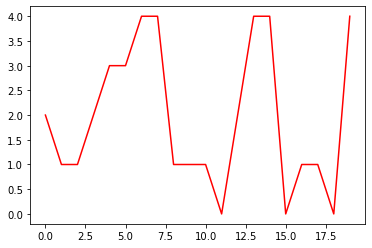

In [430]:
'''
data parsing
'''
data1 = data.split('\n')
X = data1[0].split(' ')
Y = data1[1].split(' ')
nX = [int(x) for x in X]
nY = [int(y) for y in Y]
plt.plot(nX, nY, 'r')
plt.show()

In [431]:
'''
state space
'''
A = np.array([[0.7, 0.5, 0],
            [-0.5, 0.7, 0],
            [0, 0, 0.9]])
B = np.array([1,1,1])
x0 = np.array([0.1, 0.2, 0.3])
C = np.array([0, -1, 1])
D = np.array([0.5])
N = len(nY)

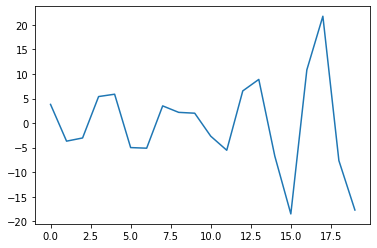

In [432]:
'''
vector u
'''
Q = np.array([[0.0 for i in range(N)] for i in range(N)])
Q[0,0] = D
for i in range(1, N):
    # print(i)
    Q[i,0] = np.matmul(np.matmul(C, matrix_power(A, i)), B)
    for j in range(1, i+1):
        Q[i,j] = Q[i-1, j-1]

Fi = np.array([np.zeros(3) for i in range(N)])
for i in range(N):
    Fi[i] = np.matmul(C, matrix_power(A, i))

u = np.matmul(np.matmul(inv(np.matmul(Q.transpose(), Q)), Q.transpose()), np.subtract(nY, np.matmul(Fi, x0)))
plt.plot(nX, u)
plt.show()

In [433]:
'''
sensor data simulating
'''
x = np.zeros((N, 3))
z = np.zeros((N, 3))
v = np.zeros((N, 3))
x[0] = x0
vx = np.random.normal(0, 1.7, N)
vy = np.random.normal(0, 1.0, N)
vz = np.random.normal(0, 1.8, N)
z[0] = x0 + [vx[0], vy[0], vz[0]]
for i in range(1, N):
    x[i] = np.matmul(A, x[i-1]) + B * u[i-1]
    z[i] = x[i] + [vx[i], vy[i], vz[i]]

# plt.plot(nX, x)
# plt.show()
# plt.plot(nX, z)
# plt.show()


In [455]:
'''
2 dimentional kalman filter
'''
#initial
H = np.eye(3)
P = np.eye(3)
R = np.array([[0.3, 0, 0],
            [0, 0.2, 0],
            [0, 0, 0.6]])
Q = np.array([[0.02, 0, 0], 
            [0, 0.02, 0], 
            [0, 0, 0.02]])
K = np.array([np.zeros(9).reshape(3,3) for i in range(N)])
xopt = np.array([np.zeros(3) for i in range(N)])
xopt[0] = x0

for i in range(1, N):
    K[i] = np.matmul(np.matmul(P, H.transpose()), inv(np.matmul(np.matmul(H, P), H.transpose()) + R))
    xopt[i] = xopt[i] + np.matmul(K[i], (z[i] - np.matmul(H, xopt[i])))
    P = np.matmul( np.matmul( A, np.matmul( (np.eye(3) - np.matmul(K[i-1], H)), P)), A) + Q
    if(i+1 < N):
        xopt[i+1] = np.matmul(A, xopt[i]) + B * u[i]


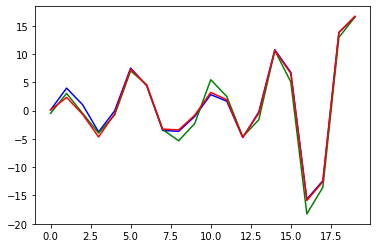

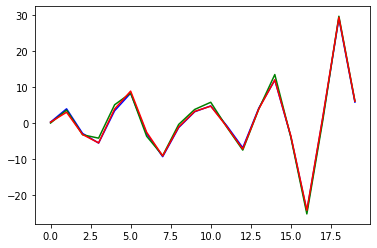

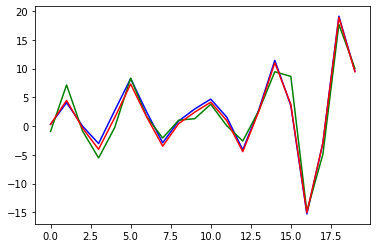

In [456]:
'''
result optimal plots
'''
xx = np.zeros(N)
for i in range(N):
    xx[i] = xopt[i, 0]
xorig = np.zeros(N)
for i in range(N):
    xorig[i] = x[i, 0]
xsensor = np.zeros(N)
for i in range(N):
    xsensor[i] = z[i, 0]

yy = np.zeros(N)
for i in range(N):
    yy[i] = xopt[i, 1]
yorig = np.zeros(N)
for i in range(N):
    yorig[i] = x[i, 1]
ysensor = np.zeros(N)
for i in range(N):
    ysensor[i] = z[i, 1]

zz = np.zeros(N)
for i in range(N):
    zz[i] = xopt[i, 2]
zorig = np.zeros(N)
for i in range(N):
    zorig[i] = x[i, 2]
zsensor = np.zeros(N)
for i in range(N):
    zsensor[i] = z[i, 2]

plt.plot(nX, xorig, 'b')
plt.plot(nX, xsensor, 'g')
plt.plot(nX, xx, 'r')
plt.show()
plt.plot(nX, yorig, 'b')
plt.plot(nX, ysensor, 'g')
plt.plot(nX, yy, 'r')
plt.show()
plt.plot(nX, zorig, 'b')
plt.plot(nX, zsensor, 'g')
plt.plot(nX, zz, 'r')
plt.show()

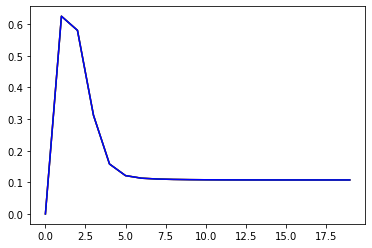

In [457]:
'''
Kalman filter coefficient plot
'''
k1 = k2 = k3 = np.zeros(N)
for i in range(N):
    k1[i] = K[i][0,0]
    k2[i] = K[i][1,1]
    k3[i] = K[i][2,2]
plt.plot(nX, k1, 'r')
plt.plot(nX, k2, 'g')
plt.plot(nX, k3, 'b')
plt.show()

In [ ]:
'''
Actually, i did not notice an essential effect of changing R and Q, with same or different values on diagonal. 1 notion is with R = [diag(-1)] K matrix becomes singular. And Q = 0 gives a 0 convergence of Kalman coefficients, whil not 0 gives convergance limit at ~diag(Q)
'''